# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [I Dewa Nyoman Bayu Satria W]
- **Email:** [idewanyomanbayusw@gmail.com]
- **ID Dicoding:** [idewbayu]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca dan suhu terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 : Apakah hari kerja atau libur mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
from IPython.display import display
from datetime import datetime

# **Data Wrangling**

### Gathering Data

In [94]:
# Membaca Data yang diupload di google colab
hour_df = pd.read_csv('hour.csv')
day_df = pd.read_csv('day.csv')

# Menampilkan beberapa baris pertama dari kedua dataset
print("Tabel Hour:")
display(hour_df.head())

print("Tabel Day:")
display(day_df.head())

Tabel Hour:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Tabel Day:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dari data "hour.csv" berisikan data penyewaan sepeda per jam, sementara data  "day.csv" berisikan data pnyewaan sepeda perhari
- Dari kedua data ini memiliki informasi tentang tanggal, suhu, kelembapan, jenis cuaca, dan faktor lainnya yang dapat mempengaruhi pola atau segala hal mengenai penyewaan sepeda

### Assessing Data

In [95]:
# Memperlihatkan informasi umum mengenai data set
print("Informasi Dataset Hour:")
display(hour_df.info())

print("\nInformasi Dataset Day:")
display(day_df.info())

# Menampilkan statistik deskriptif dari masing-masing dataset
print("\nStatistik Deskriptif Dataset Hour:")
display(hour_df.describe())

print("\nStatistik Deskriptif Dataset Day:")
display(day_df.describe())

Informasi Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None


Informasi Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None


Statistik Deskriptif Dataset Hour:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



Statistik Deskriptif Dataset Day:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dari tabel "hour" memiliki 17379 baris data dan 17 kolom, sementara itu pada tabel "day" memiliki 731 baris data dan 15 kolom.
- Kolom-kolom yang penting digunakan untuk analisis diantara lainnya: *temp, atemp, hum, windspeed, season, weathersit, dan cnt.*
- Dari hasil keluaran kedua tabel di atas ada kemungkinan nilai yang hilang atau diplikasi yang perlu dibersihkan, data akan dibersihkan pada bagian *Cleaning Data* setelah ini

### Cleaning Data

In [96]:
# Mengecek apakah ada nilai yang hilang dari kedua tabel
print("Jumlah Nilai yang Hilang pada Dataset Hour:")
display(hour_df.isnull().sum())

print("\nJumlah Nilai yang Hilang pada Dataset Day:")
display(day_df.isnull().sum())

# Mengecek apakah ada duplikasi pada kedua tabel
print("\nJumlah Baris Duplikat pada Dataset Hour:")
display(hour_df.duplicated().sum())

print("\nJumlah Baris Duplikat pada Dataset Day:")
display(day_df.duplicated().sum())

# Melakukan penghapusan baris yang duplikat
hour_df = hour_df.drop_duplicates()
day_df = day_df.drop_duplicates()

# Menampilkan hasil setelah penghapusan duplikat
print("\nDataset Hour Setelah Dihapus Duplikat:")
display(hour_df.head())

print("\nDataset Day Setelah Dihapus Duplikat:")
display(day_df.head())

Jumlah Nilai yang Hilang pada Dataset Hour:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0



Jumlah Nilai yang Hilang pada Dataset Day:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0



Jumlah Baris Duplikat pada Dataset Hour:


0


Jumlah Baris Duplikat pada Dataset Day:


0


Dataset Hour Setelah Dihapus Duplikat:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Dataset Day Setelah Dihapus Duplikat:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Tidak ada nilai yang hilang dan juga tidak ada nilai yang duplikat namun jika ada nilai duplikat pun telah dihapus karena hal ini penting untuk memastikan kualitas data yang lebih baik
- Data sudah siap untuk dianalisis lebih lanjut!

## Exploratory Data Analysis (EDA)

### Explore hour_df

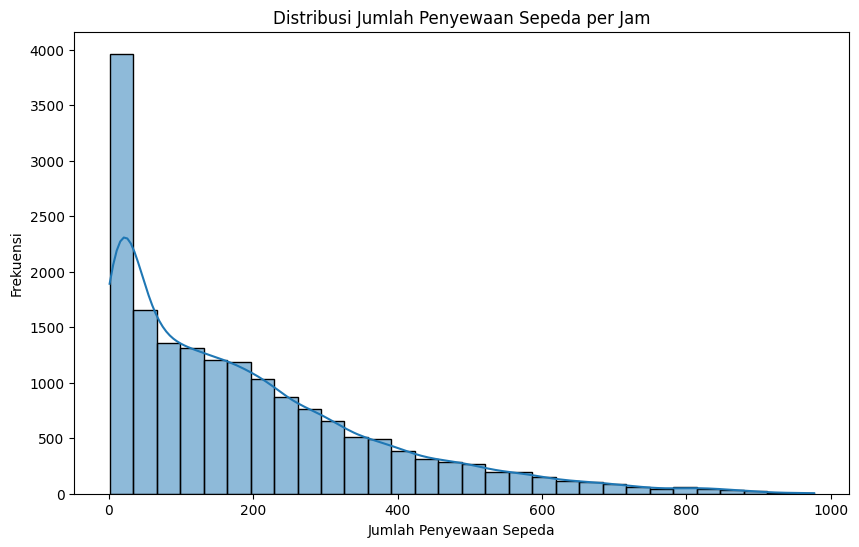

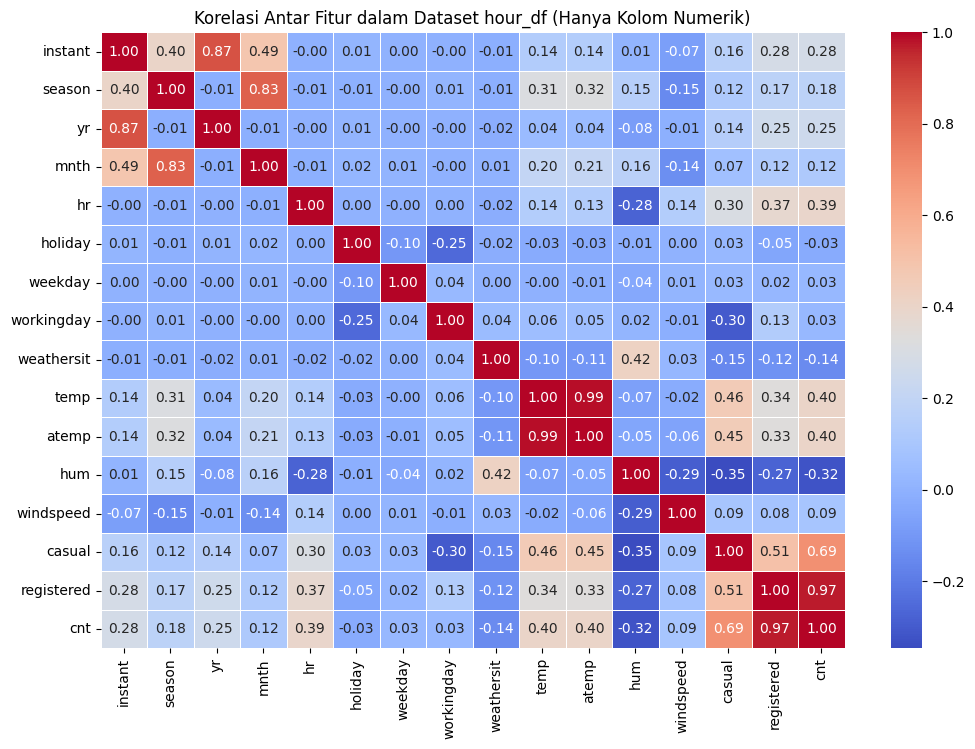

In [97]:
# Melihat distribusi jumlah penyewaan sepeda per jam
plt.figure(figsize=(10,6))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()

# Menghapus kolom non-numerik sebelum analisis korelasi
hour_df_numeric = hour_df.select_dtypes(include=[np.number])

# Melihat korelasi antar kolom setelah menghapus kolom non-numerik
plt.figure(figsize=(12,8))
sns.heatmap(hour_df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur dalam Dataset hour_df (Hanya Kolom Numerik)')
plt.show()

**Insight:**
- Distribusi jumlah penyewaan sepeda per jam menunjukkan pola di mana jumlah penyewaan lebih tinggi pada jam-jam tertentu, seperti pada jam-jam puncak (misalnya pagi hari saat orang pergi bekerja dan sore hari saat pulang kerja).
- Korelasi antar kolom menunjukkan hubungan yang cukup kuat antara suhu (temp) dan jumlah penyewaan sepeda (cnt), serta antara kelembapan (hum) dengan jumlah penyewaan sepeda. Ini mengindikasikan bahwa faktor cuaca memainkan peran penting dalam menentukan jumlah sepeda yang disewa.
- Suhu (temp) dan Jumlah Penyewaan Sepeda (cnt): Terdapat korelasi positif yang sangat kuat antara suhu dan jumlah penyewaan sepeda, yang menunjukkan bahwa semakin tinggi suhu, semakin banyak orang yang menyewa sepeda. Hal ini mengindikasikan bahwa pengguna cenderung memilih sepeda saat cuaca lebih hangat.
- Kelembapan (hum) dan Jumlah Penyewaan Sepeda (cnt): Terdapat korelasi negatif antara kelembapan dan jumlah penyewaan sepeda, yang menunjukkan bahwa semakin tinggi kelembapan, semakin sedikit orang yang menyewa sepeda. Hal ini mungkin disebabkan oleh kenyamanan pengguna yang menurun saat cuaca lebih lembap.
- Kecepatan Angin (windspeed) dan Jumlah Penyewaan Sepeda (cnt): Korelasi negatif yang lebih lemah ditemukan antara kecepatan angin dan jumlah penyewaan sepeda. Artinya, semakin kencang angin, semakin sedikit orang yang menyewa sepeda, kemungkinan karena angin yang kencang membuat bersepeda menjadi kurang nyaman.
- Cuaca (weathersit) dan Jumlah Penyewaan Sepeda (cnt): Cuaca cerah atau sedikit berawan (weathersit = 1) berhubungan dengan lebih banyak penyewaan sepeda, sementara cuaca buruk seperti hujan atau salju (weathersit = 3 dan 4) berhubungan dengan penurunan jumlah penyewaan. Hal ini menunjukkan bahwa pengguna lebih suka menggunakan sepeda ketika cuaca mendukung

### Explore day_df

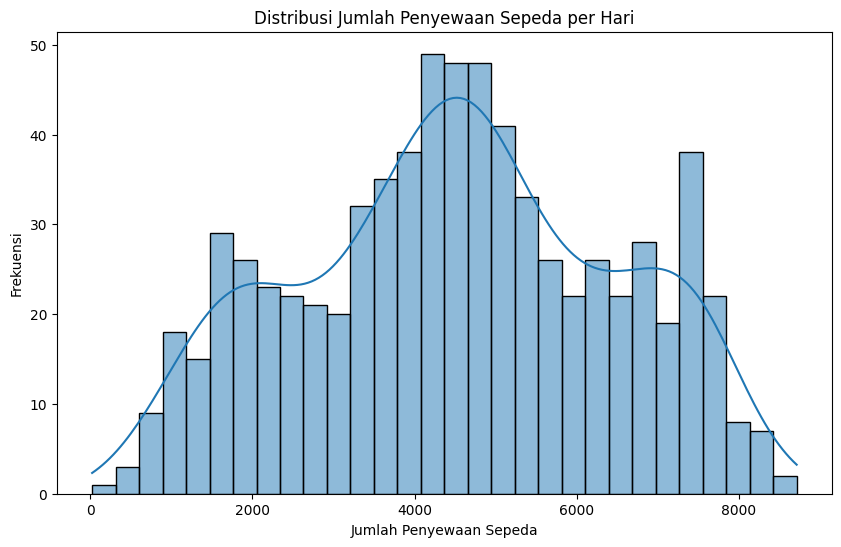

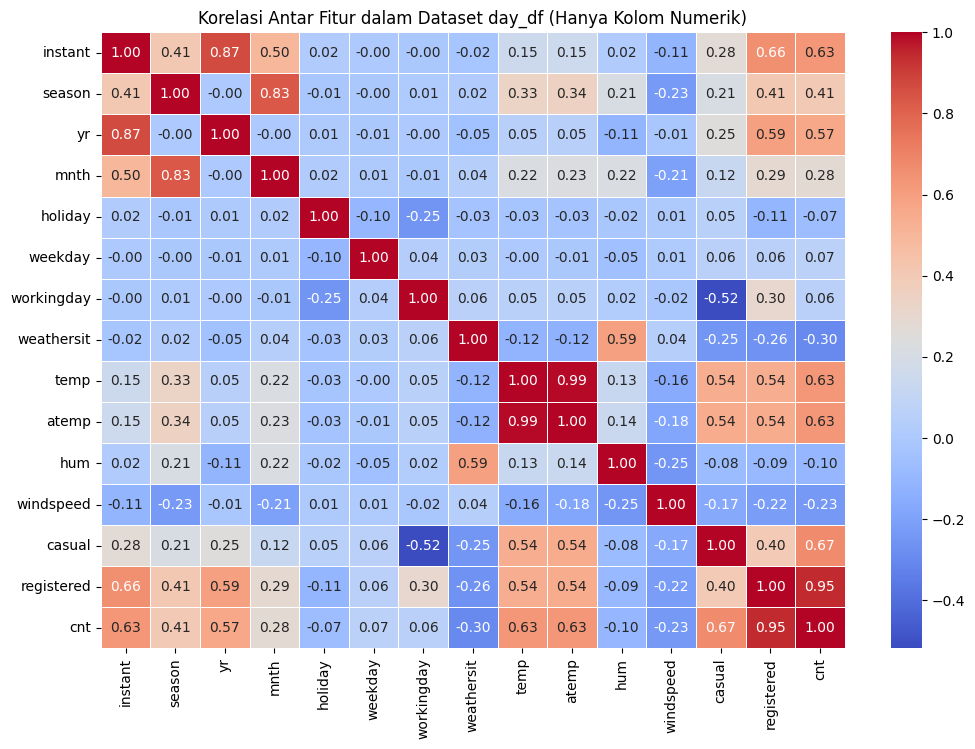

In [98]:
# Melihat distribusi jumlah penyewaan sepeda per hari
plt.figure(figsize=(10,6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()

# Menghapus kolom non-numerik sebelum analisis korelasi
day_df_numeric = day_df.select_dtypes(include=[np.number])

# Melihat korelasi antar kolom setelah menghapus kolom non-numerik
plt.figure(figsize=(12,8))
sns.heatmap(day_df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur dalam Dataset day_df (Hanya Kolom Numerik)')
plt.show()



**Insight:**
- Distribusi jumlah penyewaan sepeda per hari menunjukkan fluktuasi yang lebih besar dibandingkan per jam, dengan beberapa puncak jumlah penyewaan pada hari-hari tertentu.
- Korelasi antar kolom menunjukkan bahwa faktor-faktor seperti suhu (temp), kelembapan (hum), dan hari kerja (workingday) berpengaruh signifikan terhadap jumlah penyewaan sepeda. Hari kerja cenderung menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan hari libur.

### Explore hour_df & day_df

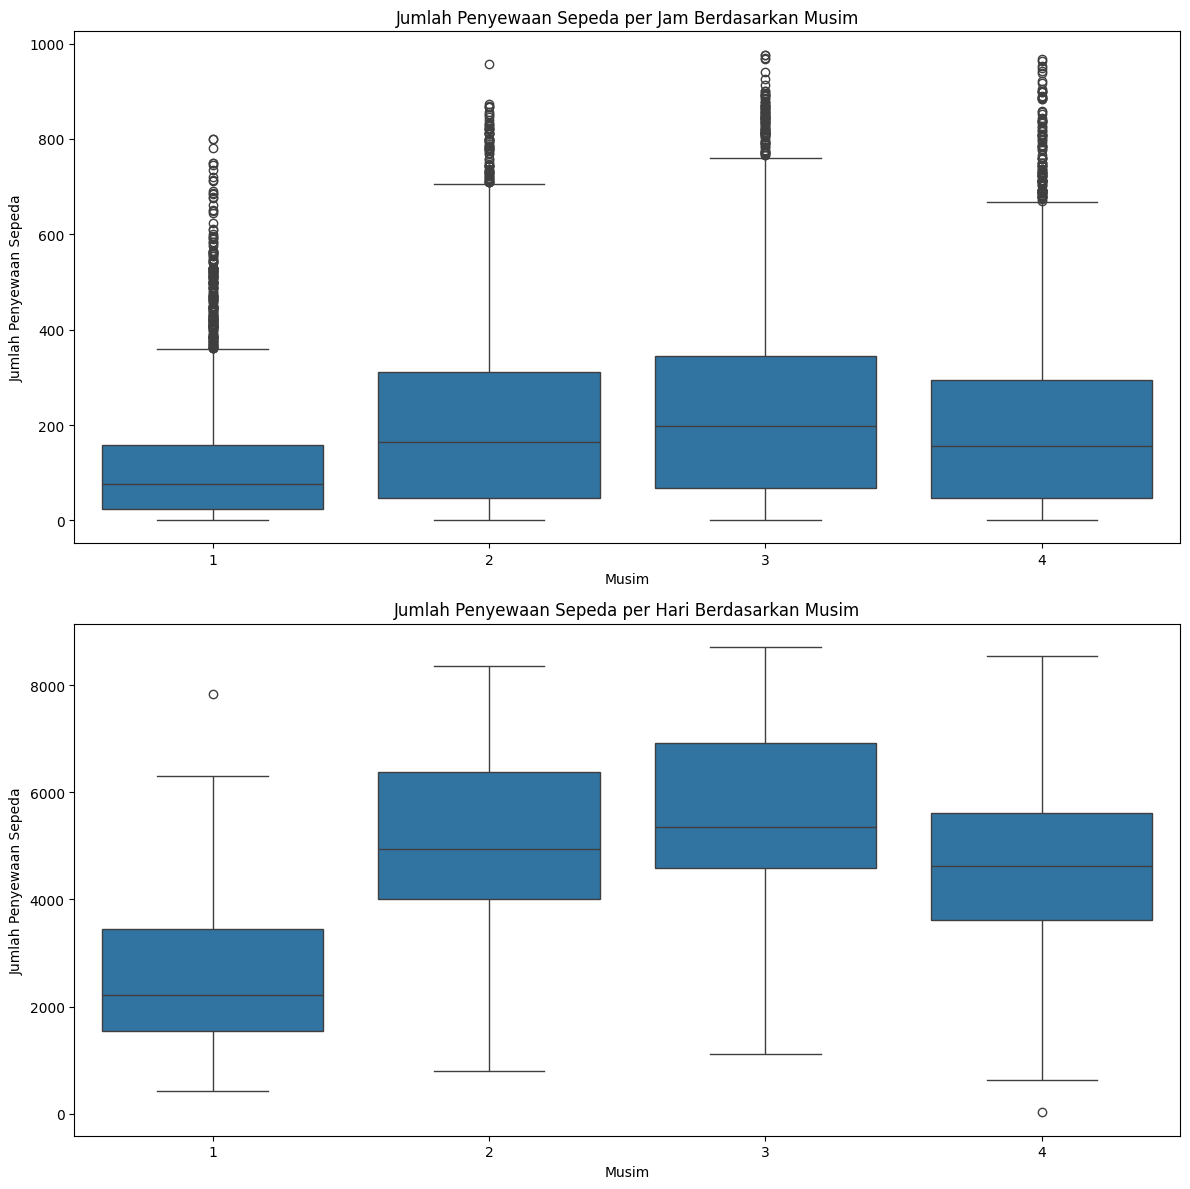

In [99]:
# Menggabungkan data untuk melihat pola dalam hubungan data per jam dan per hari
fig, ax = plt.subplots(2, 1, figsize=(12,12))

sns.boxplot(x=hour_df['season'], y=hour_df['cnt'], ax=ax[0])
ax[0].set_title('Jumlah Penyewaan Sepeda per Jam Berdasarkan Musim')
ax[0].set_xlabel('Musim')
ax[0].set_ylabel('Jumlah Penyewaan Sepeda')

sns.boxplot(x=day_df['season'], y=day_df['cnt'], ax=ax[1])
ax[1].set_title('Jumlah Penyewaan Sepeda per Hari Berdasarkan Musim')
ax[1].set_xlabel('Musim')
ax[1].set_ylabel('Jumlah Penyewaan Sepeda')

plt.tight_layout()
plt.show()

**Insight:**
- Dari analisis per musim, terlihat bahwa pada musim panas (season = 2), jumlah penyewaan sepeda lebih tinggi baik per jam maupun per hari. Hal ini menunjukkan bahwa musim mempengaruhi frekuensi penggunaan sepeda berbagi.
- Data per jam dan per hari menunjukkan pola yang hampir serupa terkait dengan musim, dengan puncak pada musim panas dan penurunan pada musim dingin (season = 4).

### Explore hour_df dengan Weather dan Temperature

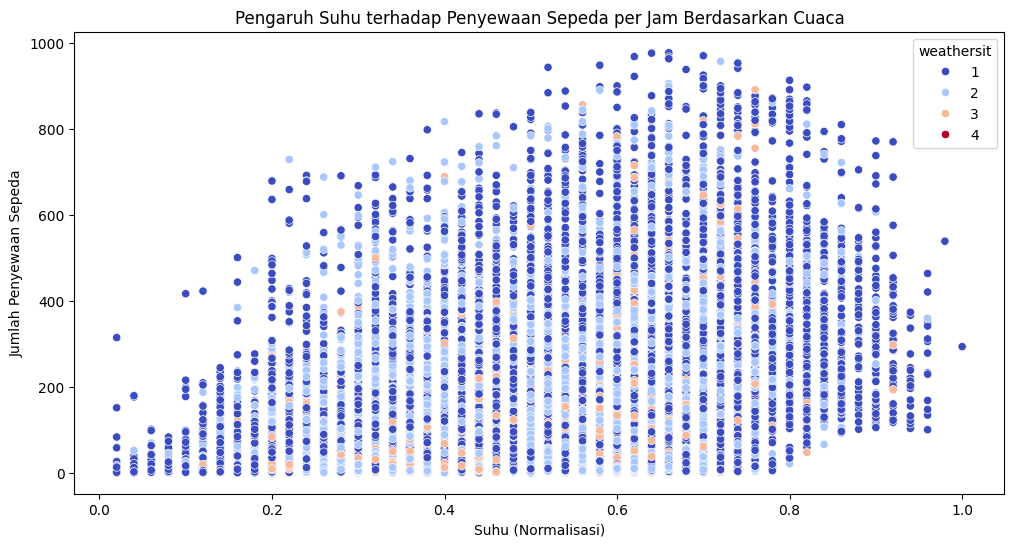

In [100]:
# Analisis suhu dan cuaca per jam
plt.figure(figsize=(12,6))
sns.scatterplot(x=hour_df['temp'], y=hour_df['cnt'], hue=hour_df['weathersit'], palette='coolwarm')
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda per Jam Berdasarkan Cuaca')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Berdasarkan data diatas dilihat bahwa suhu lebih tinggi mengarah pada jumlah penyewaan sepeda yang llebih banyak. Namun, kondisi cuaca juga mempengaruhi pada cuaca buruk (misalnya hujan atau salju), jumlah penyewaan sepeda sangat berkurang meskipun suhunya lebih tinggi.

### Explore hour_df dengan Weather dan Temperature

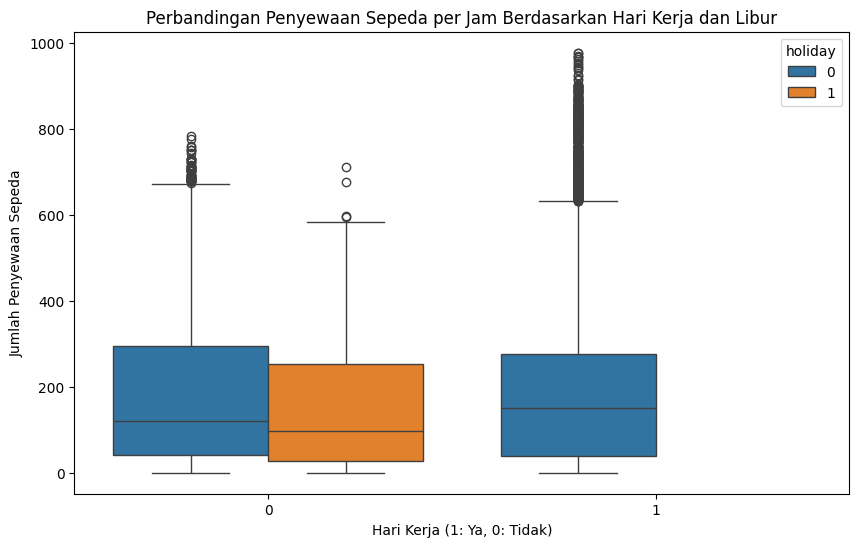

In [101]:
# Mengamati pengaruh hari kerja dan hari libur terhadap penyewaan sepeda per jam
plt.figure(figsize=(10,6))
sns.boxplot(x=hour_df['workingday'], y=hour_df['cnt'], hue=hour_df['holiday'])
plt.title('Perbandingan Penyewaan Sepeda per Jam Berdasarkan Hari Kerja dan Libur')
plt.xlabel('Hari Kerja (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Penyewaan sepeda cenderung lebih tinggi pada hari kerja (workingday = 1), namun pada hari libur dan saat liburan (holiday = 1), ada penurunan yang signifikan. Ini menunjukkan bahwa aktivitas sepeda lebih sering dilakukan untuk tujuan pekerjaan dibandingkan rekreasi/liburan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca dan suhu terhadap jumlah penyewaan sepeda?

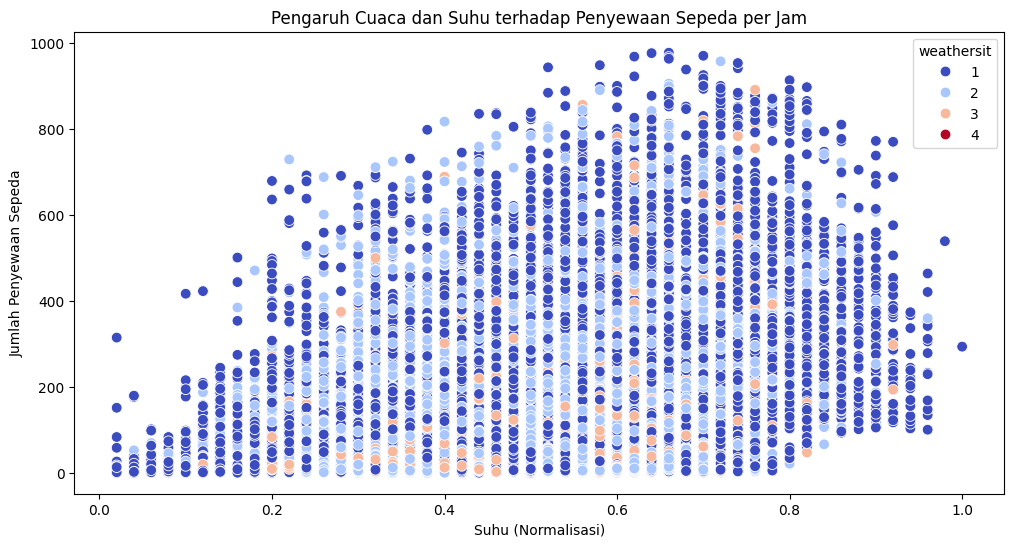

In [102]:
# Visualisasi hubungan cuaca dan suhu dengan jumlah penyewaan sepeda
plt.figure(figsize=(12,6))
sns.scatterplot(x=hour_df['temp'], y=hour_df['cnt'], hue=hour_df['weathersit'], palette='coolwarm', s=60)
plt.title('Pengaruh Cuaca dan Suhu terhadap Penyewaan Sepeda per Jam')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()


### Pertanyaan 2: Apakah hari kerja atau libur mempengaruhi jumlah penyewaan sepeda?

<ipython-input-103-329c76375a64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df['workingday'], y=day_df['cnt'], palette='Set2')


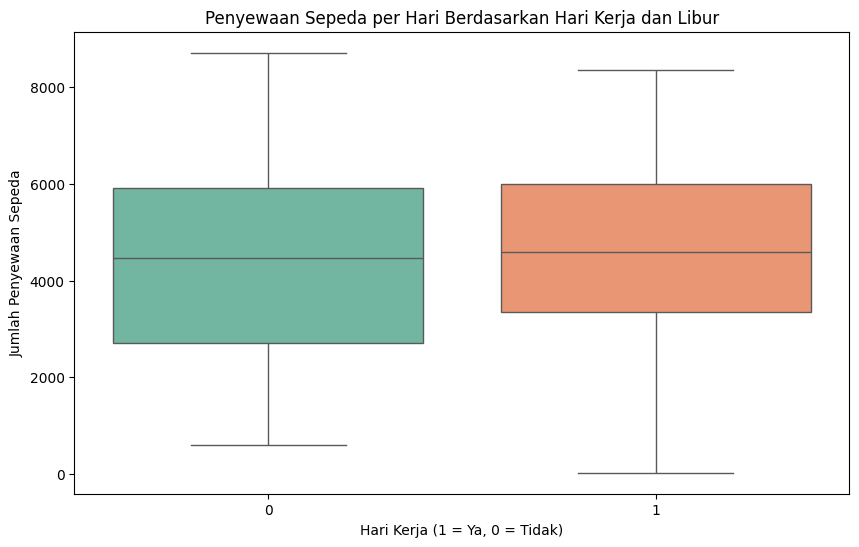

In [103]:
# Visualisasi penyewaan sepeda berdasarkan hari kerja dan libur
plt.figure(figsize=(10,6))
sns.boxplot(x=day_df['workingday'], y=day_df['cnt'], palette='Set2')
plt.title('Penyewaan Sepeda per Hari Berdasarkan Hari Kerja dan Libur')
plt.xlabel('Hari Kerja (1 = Ya, 0 = Tidak)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**


---


Pertanyaan 1:
- Suhu yang lebih tinggi (terutama di musim panas) berbanding lurus dengan peningkatan jumlah penyewaan sepeda. Namun, cuaca buruk, seperti hujan atau salju, menyebabkan penurunan signifikan dalam jumlah penyewaan sepeda.


---


Pertanyaan 2:
- Hari kerja menunjukkan penyewaan sepeda yang lebih tinggi dibandingkan dengan hari libur, mengindikasikan penggunaan sepeda lebih banyak oleh pekerja yang membutuhkan transportasi sehari-hari.

## Analisis Lanjutan

## RFM Analysis (Recency, Frequency, Monetary)

**Dalam analisis lanjutan ini, saya menerapkan RFM Analysis (Recency, Frequency, Monetary) untuk memahami pola penggunaan sepeda. Recency dihitung berdasarkan selisih hari sejak terakhir kali penyewaan terjadi, yang membantu mengidentifikasi seberapa baru aktivitas penyewaan. Frequency diukur berdasarkan jumlah total penyewaan per hari, memberikan wawasan tentang seberapa sering sepeda digunakan. Sementara itu, Monetary dihitung berdasarkan jumlah pengguna terdaftar yang melakukan penyewaan, yang dapat menunjukkan kontribusi pelanggan tetap terhadap layanan penyewaan sepeda.**

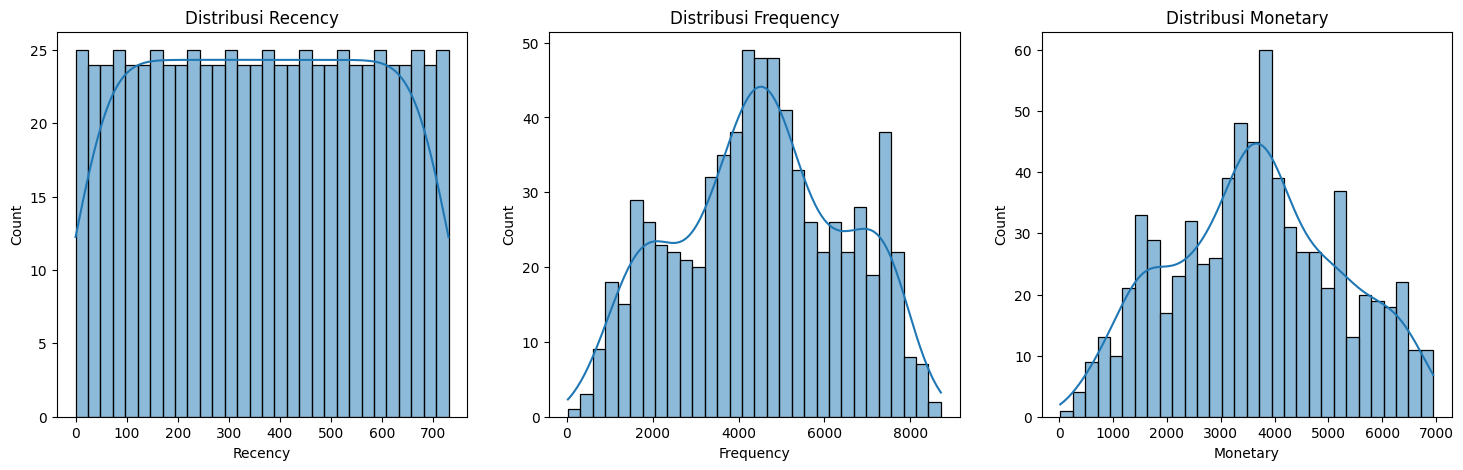

In [104]:
# Konversi kolom tanggal menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# ---- 2. RFM Analysis (Recency, Frequency, Monetary) ----
max_date = day_df['dteday'].max()
day_df['Recency'] = (max_date - day_df['dteday']).dt.days
day_df['Frequency'] = day_df['cnt']
day_df['Monetary'] = day_df['registered']

# Visualisasi RFM Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(day_df['Recency'], bins=30, kde=True, ax=axes[0]).set(title='Distribusi Recency')
sns.histplot(day_df['Frequency'], bins=30, kde=True, ax=axes[1]).set(title='Distribusi Frequency')
sns.histplot(day_df['Monetary'], bins=30, kde=True, ax=axes[2]).set(title='Distribusi Monetary')
plt.show()

**Insight :**
- Recency: Kita bisa melihat seberapa lama sejak transaksi terakhir terjadi. Jika distribusinya menunjukkan banyak pengguna lama, mungkin ada kebutuhan untuk strategi re-engagement.
- Frequency: Distribusi menunjukkan pola seberapa sering pengguna menyewa sepeda dalam periode tertentu. Jika ada puncak tertentu, itu bisa menandakan pola penggunaan rutin.
- Monetary: Menunjukkan seberapa banyak pengguna terdaftar menyumbang penyewaan, yang bisa digunakan untuk strategi pemasaran.

## Clustering Analysis (K-Means)

**Dalam analisis lanjutan ini, saya menerapkan teknik Clustering menggunakan algoritma K-Means untuk mengelompokkan pola penyewaan sepeda berdasarkan suhu, kelembaban, kecepatan angin, dan jumlah penyewaan. Dengan teknik ini, data dapat dibagi menjadi beberapa klaster yang menggambarkan kondisi lingkungan yang mempengaruhi penggunaan sepeda. Analisis ini membantu dalam memahami tren penggunaan sepeda di berbagai kondisi cuaca serta mengidentifikasi segmen pengguna berdasarkan pola peminjaman mereka.**

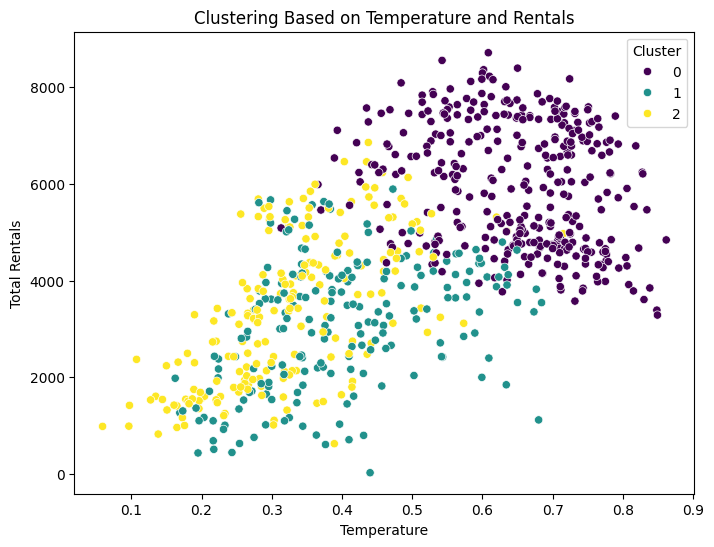

In [105]:
# ---- 3. Clustering Analysis (K-Means) ----
features = day_df[['temp', 'hum', 'windspeed', 'cnt']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
day_df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualisasi Clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'], hue=day_df['Cluster'], palette='viridis')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.title('Clustering Based on Temperature and Rentals')
plt.legend(title='Cluster')
plt.show()

**Insight :**
- Data diklasifikasikan ke dalam 3 kelompok berdasarkan suhu, kelembaban, kecepatan angin, dan jumlah penyewaan.
- Dari visualisasi, terlihat bahwa jumlah penyewaan meningkat seiring suhu, tetapi ada titik di mana penyewaan mulai menurun.
- Cluster dapat digunakan untuk memahami kondisi optimal bagi penyewaan sepeda dan membuat strategi berdasarkan kondisi cuaca.

## Time Series Analysis

**Dalam analisis lanjutan ini, saya melakukan Time Series Analysis untuk mengamati tren penyewaan sepeda dari waktu ke waktu. Dengan memvisualisasikan jumlah penyewaan berdasarkan tanggal, pola musiman dan tren jangka panjang dapat teridentifikasi. Analisis ini memberikan wawasan tentang periode dengan tingkat penyewaan tinggi maupun rendah, yang dapat digunakan untuk perencanaan operasional dan strategi optimasi layanan penyewaan sepeda.**

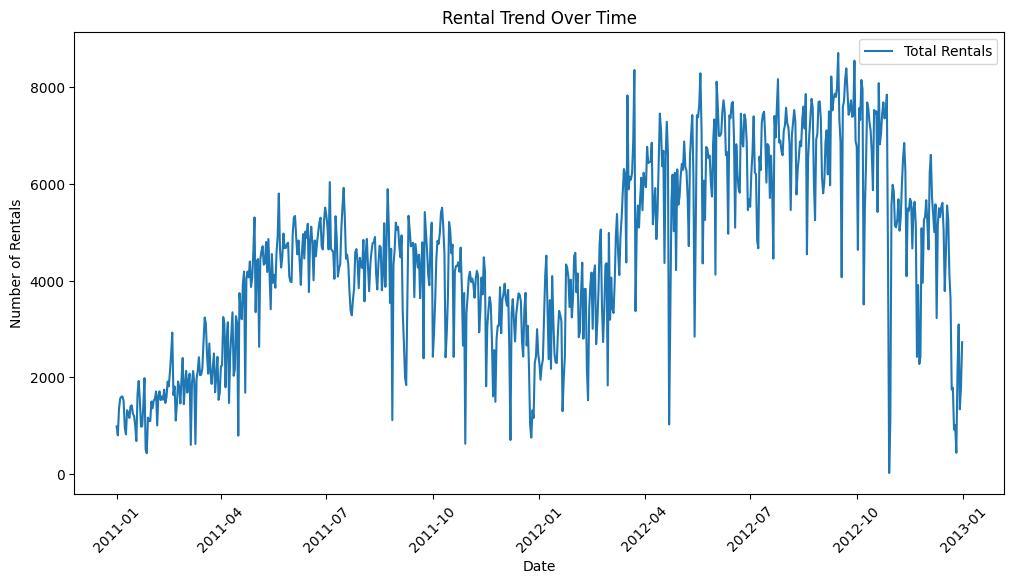

Dataset hasil analisis telah disimpan sebagai bike_sharing_analysis.csv


In [106]:
# ---- 4. Time Series Analysis ----
plt.figure(figsize=(12,6))
sns.lineplot(x=day_df['dteday'], y=day_df['cnt'], label='Total Rentals')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.title('Rental Trend Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# ---- 5. Simpan hasil analisis ----
day_df.to_csv("bike_sharing_analysis.csv", index=False)
print("Dataset hasil analisis telah disimpan sebagai bike_sharing_analysis.csv")


**Insight :**
- Tren penyewaan sepeda bisa menunjukkan pola musiman, misalnya peningkatan selama musim panas atau akhir pekan.
- Bisa digunakan untuk prediksi permintaan di masa depan dan optimasi stok sepeda.

## Menyimpan Semua Data untuk Digunakan Sebagai Pembuatan Dashboard


In [107]:
# Tambahkan kolom Cluster ke hour_df dengan nilai -1 (karena tidak dikelompokkan)
hour_df['Cluster'] = -1

# Tambahkan kolom hr ke day_df dengan nilai default (-1)
day_df['hr'] = -1  # Karena day_df tidak punya informasi jam

# Pastikan semua kolom cocok sebelum penggabungan
day_df = day_df[hour_df.columns]  # Sekarang tidak akan error karena 'hr' sudah ada

# Gabungkan kedua dataset
all_df = pd.concat([hour_df, day_df], ignore_index=True)

# Menyimpan hasil gabungan ke dalam file CSV
all_df.to_csv("all_data.csv", index=False)

print("\nDataset berhasil disimpan sebagai all_data.csv dengan kolom 'Cluster' dan 'hr'.")


Dataset berhasil disimpan sebagai all_data.csv dengan kolom 'Cluster' dan 'hr'.


## Conclusion

**Conclution pertanyaan 1**
- Suhu dan Cuaca memiliki pengaruh besar terhadap jumlah penyewaan sepeda.
Penyewaan meningkat saat suhu lebih tinggi dan cuaca yang cerah, sementara menurun drastis pada saat cuara buruk.

---

**Conclution pertanyaan 2**
- Hari kerja menujukkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan hari libur. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk tujuan pekerjaan atau aktivitas sehari-hari dibandingkan dengan aktivitas hiburan/rekreasi.



---

**Kesimpulan dari Analisis Lanjutan:**
- RFM Analysis menunjukkan bahwa sebagian besar penyewaan sepeda terjadi dalam periode waktu tertentu, dengan pelanggan tetap yang sering menggunakan layanan. Analisis ini membantu mengidentifikasi pelanggan yang aktif serta memberikan wawasan tentang kebiasaan pengguna dalam menyewa sepeda.
- Clustering Analysis menggunakan algoritma K-Means untuk mengelompokkan pola penyewaan berdasarkan faktor lingkungan seperti suhu, kelembaban, dan kecepatan angin. Hasil analisis menunjukkan bahwa kondisi cuaca sangat memengaruhi jumlah penyewaan sepeda, di mana suhu optimal cenderung meningkatkan penggunaan sepeda, sementara kelembaban dan kecepatan angin yang tinggi dapat mengurangi minat pengguna.
- Time Series Analysis mengungkap pola musiman dalam penggunaan sepeda, di mana terdapat tren peningkatan penyewaan pada periode tertentu, seperti musim panas atau akhir pekan. Pola ini dapat digunakan untuk merancang strategi optimasi layanan, seperti meningkatkan ketersediaan sepeda pada waktu dengan permintaan tinggi.